<a href="https://colab.research.google.com/github/swethanarayanan/algorithms/blob/master/Singular_Value_Decomposition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We’ll attempt to classify handwritten digits. Fortunately, the scikit-learn library provides a wrapper function for importing the dataset into our program.

https://towardsdatascience.com/singular-value-decomposition-example-in-python-dab2507d85a0

In [0]:
import numpy as np
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt
from sklearn.decomposition import TruncatedSVD
float_formatter = lambda x: "%.2f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})
from sklearn.ensemble import RandomForestClassifier

In [0]:
X, y = load_digits(return_X_y=True)

The dataset contains 1797 8x8 images. If you specify return_X_y=True the function will return the pixels as a one dimensional array.


In [6]:
X.shape

(1797, 64)

Let’s take a look at the first digit. As we can see, it’s simply an array of length 64 containing the pixel intensities.

In [10]:
image = X[2]
image

array([0.00, 0.00, 0.00, 4.00, 15.00, 12.00, 0.00, 0.00, 0.00, 0.00, 3.00,
       16.00, 15.00, 14.00, 0.00, 0.00, 0.00, 0.00, 8.00, 13.00, 8.00,
       16.00, 0.00, 0.00, 0.00, 0.00, 1.00, 6.00, 15.00, 11.00, 0.00,
       0.00, 0.00, 1.00, 8.00, 13.00, 15.00, 1.00, 0.00, 0.00, 0.00, 9.00,
       16.00, 16.00, 5.00, 0.00, 0.00, 0.00, 0.00, 3.00, 13.00, 16.00,
       16.00, 11.00, 5.00, 0.00, 0.00, 0.00, 0.00, 3.00, 11.00, 16.00,
       9.00, 0.00])

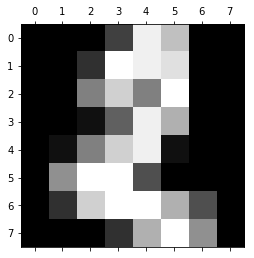

In [11]:
image = image.reshape((8, 8))
plt.matshow(image, cmap = 'gray')

Next, we’ll use Singular Value Decomposition to see whether we are able to reconstruct the image using only 2 features for each row. The s matrix returned by the function must be converted into a diagonal matrix using the diag method. By default, diag will create a matrix that is n x n, relative to the original matrix. This causes a problem as the size of the matrices no longer follow the rule of matrix multiplication where the number of columns in a matrix must match the number of rows in the other matrix. Therefore, we create a new m x n matrix and populate the first n x n part of it with the diagonal matrix.


In [21]:
import numpy
import math
U, s, V = np.linalg.svd(image)
S = np.zeros((image.shape[0], image.shape[1]))
S[:image.shape[0], :image.shape[0]] = np.diag(s)
n_component = 2
S = S[:, :n_component]
S.shape

(8, 2)

In [0]:
A = U.dot(Sigma.dot(VT))
print(A)

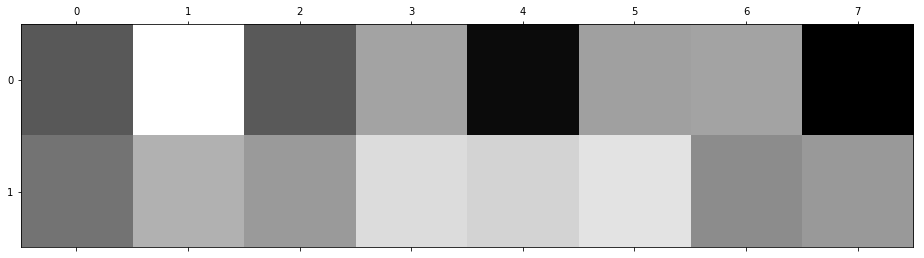

In [20]:
plt.matshow(A, cmap = 'gray')